In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from Ker_exp_data import *
from operator import add
from scipy import signal, stats


In [19]:
n = 125
data = Load_exp_data()
D_n = data.get_nominal_dir()
l=0
size = len(data.get_timeframe(l))
js = data.get_joy_dir(l,size) #one block one coh
b = 0
#js_clean, D_n_clean = data.clean_nan(js[b],D_n[b])
coh = data.get_coh_val(b*10)
tf = np.asarray(data.get_timeframe(0))
dt = np.mean(tf[1:]-tf[:-1])*1000

data loaded


In [20]:
coh_id = data.get_coh_id()
coh_id = dict(sorted(coh_id.items()))

# calculating all 3 correlation of the physical stimulus

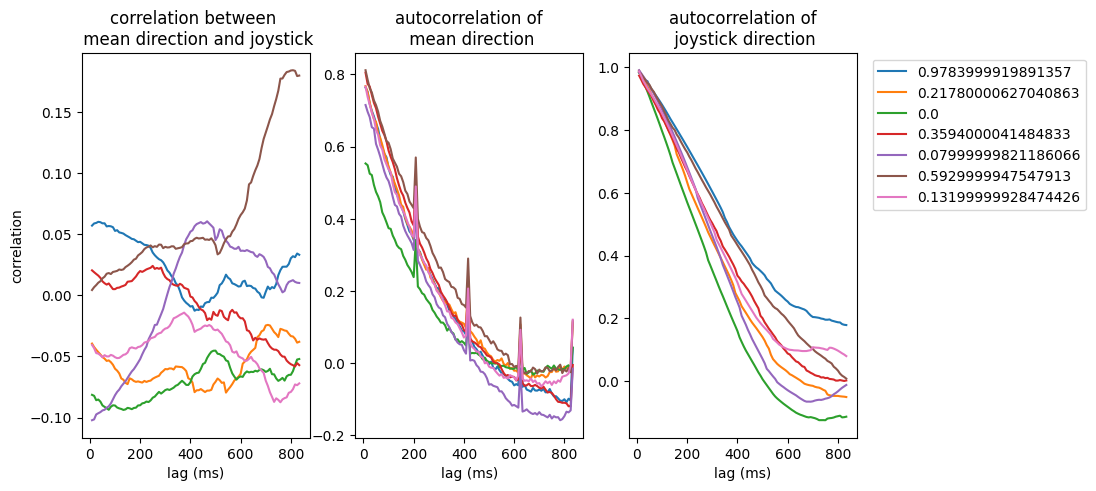

In [29]:
# correlation for D_mean_D_mean
fig,ax = plt.subplots(1,3, figsize=(10, 5))
i=0
ax[i].set_ylabel('correlation')
for file_name,title in zip(['D_mean_J/','D_mean_D_mean/','J_J/'],['correlation between \n mean direction and joystick','autocorrelation of\n mean direction','autocorrelation of\n joystick direction']):
    path = '/Users/Selma/Desktop/PhD/data/20221206_aaa/Mean_correlation/Solo_block_1/'+file_name
    num_to_coh = np.loadtxt(path+'num_to_coh.txt',delimiter=',')
    ax[i].set_xlabel('lag (ms)')
    ax[i].set_title(title)
    for num,coh in zip(num_to_coh[0],num_to_coh[1]):
        file = np.loadtxt(path+str(int(num))+'.txt', delimiter=",")
        ax[i].plot(file[1]*8.33,file[0],label=str(coh))    
    i+=1
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

## The PDF of D(t)

In [23]:
from itertools import zip_longest

In [24]:
PDF ={}
for coh,list_block in coh_id.items():
    hist = []
    for block in list_block:
        for line in range(block*10,(block+1)*10):
            size = len(data.get_timeframe(line))
            dirr = data.get_mean_dir(line,size)
            dirr_nom = data.data['rdp_dir'][line]*np.pi/180
            hist += list(dirr-dirr_nom) #[h+d-d_n for h,d,d_n in zip_longest(hist,dirr,dirr_nom,fillvalue=0)]
    PDF[coh] = np.array(hist)       

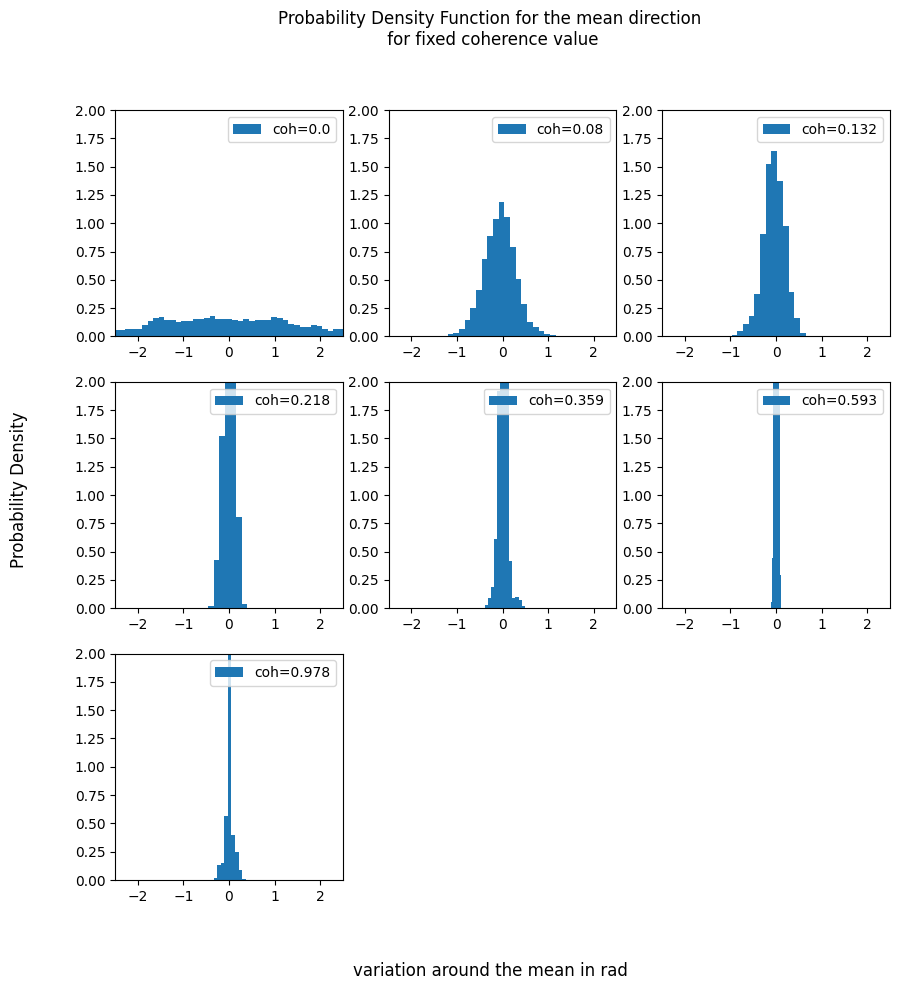

In [25]:
fig, axs = plt.subplots(3,3, figsize=(10, 10))
i = 0
for coh,pdf in PDF.items():
    ax = axs.flat[i]
    ax.hist(pdf,label='coh='+str(np.round(coh,3)),density=True,bins=100)
    ax.legend()
    ax.set_xlim(-2.5,2.5)
    ax.set_ylim(0,2)
    i+=1
## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj
fig.suptitle('Probability Density Function for the mean direction\n for fixed coherence value')
fig.supylabel('Probability Density')
fig.supxlabel('variation around the mean in rad')
plt.show()

## Numerical Standard Deviation for PDF

In [26]:
PDF_std = {}
for coh,pdf in PDF.items():
    PDF_std[coh] = pdf.std()
print(PDF_std)

{0.0: 2.7135813321716094, 0.07999999821186066: 1.3200727798733853, 0.13199999928474426: 1.096512736182762, 0.21780000627040863: 0.3573553014620076, 0.3594000041484833: 0.694648389563271, 0.5929999947547913: 0.03270350392324636, 0.9783999919891357: 0.08942439443564892}


## STD vs Coherence

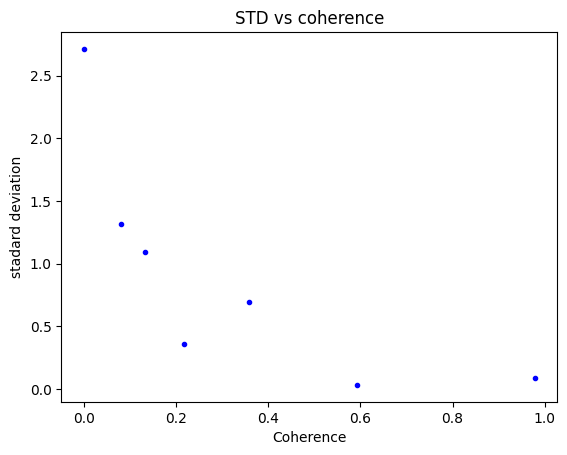

In [27]:
plt.figure()
plt.title('STD vs coherence')
plt.xlabel('Coherence')
plt.ylabel('stadard deviation')
plt.plot(*zip(*PDF_std.items()),'.',color='blue')
plt.show()